In [21]:
import speech_recognition as sr
from os import path
from pydub import AudioSegment
import math
sermon = "matt"
# convert mp3 file to wav                                                       
sound = AudioSegment.from_mp3(sermon+".mp3")
#sound
#sound.export("sermon.wav", format="wav")
length = math.floor(sound.duration_seconds/200)
files = []
print("File chunks: "+ str(length))
for x in range(length):
    excert = x * (200*1000)
    endexcert = excert + (200*1000)
    print(excert, endexcert)
    finalexcert = sound[excert:endexcert]
    finalexcert.export(sermon+"_" + str(x) +".wav", format="wav")
    files.append(sermon+"_" + str(x) +".wav")
print(length*200*1000)
finalexcert = sound[length*200*1000:]
finalexcert.export(sermon+"_" + str(length+1) +".wav", format="wav")
files.append(sermon+"_" + str(length+1) +".wav")

File chunks: 8
0 200000
200000 400000
400000 600000
600000 800000
800000 1000000
1000000 1200000
1200000 1400000
1400000 1600000
1600000


In [22]:
output = ""
r = sr.Recognizer()
count = 1
for f in files:
    print("Converting file: " + str(count))
    count += 1
    with sr.AudioFile(f) as source:
    
        audio = r.record(source, duration=200)  # read the entire audio file                  

        output+=r.recognize_google(audio)
        print(output)
        print(len(output))

Converting file: 1
good morning 1548 Heights on this Lord's Day morning wherever you are listening to or watching this message it's good to to be speaking to you and to be thinking about you on the way into the church building this morning I heard a little piece on NPR that the FDA FDA has finalized a test for the coronavirus that gives results in 5 to 13 minutes I'm being totally serious you may have heard the news by now I hope I hope you have taken seriously it's NPR I'm sure many of us would love to have sermons that deliver results in 5 to 13 minutes amen God never returns void but we also know that we have to be paying attention that we have to have ears to hear and I was so inspired to listen to those and just felt that they would be a timely word for us here and it's we're talking about expecting great things Easter on April 12th and we're called Isaiah to wait upon the Lord very proactive
891
Converting file: 2
good morning 1548 Heights on this Lord's Day morning wherever you 

good morning 1548 Heights on this Lord's Day morning wherever you are listening to or watching this message it's good to to be speaking to you and to be thinking about you on the way into the church building this morning I heard a little piece on NPR that the FDA FDA has finalized a test for the coronavirus that gives results in 5 to 13 minutes I'm being totally serious you may have heard the news by now I hope I hope you have taken seriously it's NPR I'm sure many of us would love to have sermons that deliver results in 5 to 13 minutes amen God never returns void but we also know that we have to be paying attention that we have to have ears to hear and I was so inspired to listen to those and just felt that they would be a timely word for us here and it's we're talking about expecting great things Easter on April 12th and we're called Isaiah to wait upon the Lord very proactiveTreynor years in our eyes to listen and to look for God's greatness because we can expect God to show his gre

good morning 1548 Heights on this Lord's Day morning wherever you are listening to or watching this message it's good to to be speaking to you and to be thinking about you on the way into the church building this morning I heard a little piece on NPR that the FDA FDA has finalized a test for the coronavirus that gives results in 5 to 13 minutes I'm being totally serious you may have heard the news by now I hope I hope you have taken seriously it's NPR I'm sure many of us would love to have sermons that deliver results in 5 to 13 minutes amen God never returns void but we also know that we have to be paying attention that we have to have ears to hear and I was so inspired to listen to those and just felt that they would be a timely word for us here and it's we're talking about expecting great things Easter on April 12th and we're called Isaiah to wait upon the Lord very proactiveTreynor years in our eyes to listen and to look for God's greatness because we can expect God to show his gre

good morning 1548 Heights on this Lord's Day morning wherever you are listening to or watching this message it's good to to be speaking to you and to be thinking about you on the way into the church building this morning I heard a little piece on NPR that the FDA FDA has finalized a test for the coronavirus that gives results in 5 to 13 minutes I'm being totally serious you may have heard the news by now I hope I hope you have taken seriously it's NPR I'm sure many of us would love to have sermons that deliver results in 5 to 13 minutes amen God never returns void but we also know that we have to be paying attention that we have to have ears to hear and I was so inspired to listen to those and just felt that they would be a timely word for us here and it's we're talking about expecting great things Easter on April 12th and we're called Isaiah to wait upon the Lord very proactiveTreynor years in our eyes to listen and to look for God's greatness because we can expect God to show his gre

In [23]:
import datetime
transcribed = datetime.datetime.today().strftime("%m_%d_%y")
sermonFile = sermon+"_"+transcribed+ ".txt"
text_file = open(sermonFile, "w")
text_file.write(output)
text_file.close()

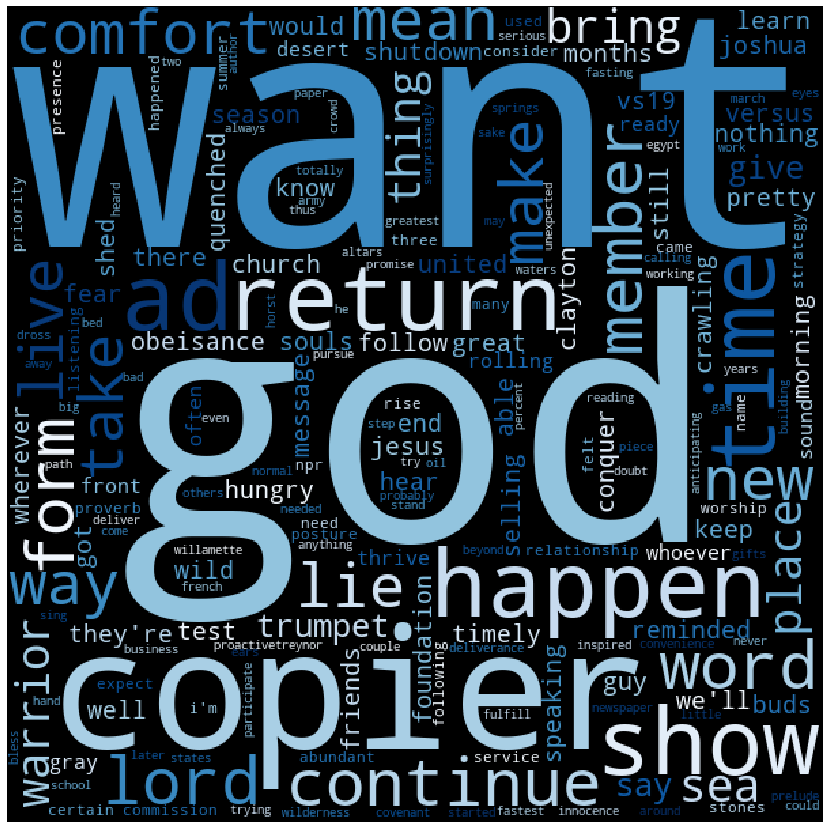

In [31]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
 
# Read the whole text.
text = open(sermonFile).read()
stop_words = set(stopwords.words('english'))
text = " ".join(list(set(text.lower().split())))
# Generate a word cloud object and plot it on the x and y axis
wordcloud = WordCloud(stopwords = stop_words, width=600, height=600, colormap="Blues", collocations=False).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
#Turn off the axis. Otherwise you will see a bunch of extra numbers around the word cloud
plt.axis("off")
 
#Show the word cloud
plt.show()

In [33]:
plt.savefig(sermon+"_"+datetime.datetime.today().strftime("%m_%d_%y"))

<Figure size 432x288 with 0 Axes>

In [28]:
len(output)

9759